In [1]:
from nltk.tokenize import word_tokenize
import re
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import numpy as np
import pickle

from tensorflow.keras import regularizers, initializers, optimizers, callbacks
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

C:\Users\HYK\Anaconda3\envs\kafake_news_app_1\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HYK\Anaconda3\envs\kafake_news_app_1\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HYK\Anaconda3\envs\kafake_news_app_1\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HYK\Anaconda3\envs\kafake_news_app

In [2]:
true = pd.read_csv(r"data/True.csv")
fake = pd.read_csv(r"data/Fake.csv")

true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
true["target"] = 0
fake["target"] = 1

true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [4]:
df = pd.concat([true,fake])
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [5]:
print(len(true) + len(fake))
print(len(df))

44898
44898


In [6]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head()

,title,text,subject,date,target
8799,Bundy Militia Just ADMITTED They Have Been Ac...,"Recently, the Federal Bureau of Investigation ...",News,"January 12, 2016",1
9338,SARAH SANDERS Hits Back At Senator Warren For ...,Notice in the exchange below that the reporter...,politics,"Nov 27, 2017",1
17109,U.S. GOVERNMENT THREATENS ILLEGAL SEIZURE OF F...,This case has been on our radar for some time ...,Government News,"Sep 9, 2015",1
21293,German killer nurse suspected of 84 more murde...,FRANKFURT (Reuters) - A German nurse jailed fo...,worldnews,"August 28, 2017",0
2854,Trump Targets Clean Water And Clean Air Regul...,It s official. Donald Trump is literally tryin...,News,"January 25, 2017",1


### Preprocessing

In [7]:
def basic_text_cleaning(line_from_column):
    # This function takes in a string, not a list or an array for the arg line_from_column
    
    tokenized_doc = word_tokenize(line_from_column)
    
    new_review = []
    for token in tokenized_doc:
        new_token = regex.sub(u'', token)
        if not new_token == u'':
            new_review.append(new_token)
    
    new_term_vector = []
    for word in new_review:
        if not word in stopwords.words('english'):
            new_term_vector.append(word)
    
    final_doc = []
    for word in new_term_vector:
        final_doc.append(wordnet.lemmatize(word))
    
    return ' '.join(final_doc)

def get_dummies(df, col_target):
    df_y = pd.get_dummies(df[col_target])
    df_new = df.join(df_y)
    df_new = df_new.drop(col_target,axis=1)
    return df_new

def prep_features(df, labels, text):
    y = df[labels].values
    comments_train = df[text]
    comments_train = list(comments_train)
    
    return comments_train, y

def prep_tokenizer(texts,MAX_NB_WORDS):
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(texts)
    
    print("Tokeniser created - Saving Tokeniser")
    
    with open('tokenizer.pickle', 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
    print("Tokeniser saved")
    
def prepare_training_test_data(texts,tokenizer,y):
    sequences = tokenizer.texts_to_sequences(texts)
    word_index = tokenizer.word_index
    print('Vocabulary size:', len(word_index))
    
    print("Padding sequences")
    
    data = pad_sequences(sequences, padding = 'post', maxlen = MAX_SEQUENCE_LENGTH)
    print('Shape of data tensor:', data.shape)
    
    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)
    data = data[indices]
    labels = y[indices]
    
    num_validation_samples = int(VALIDATION_SPLIT*data.shape[0])
    x_train = data[: -num_validation_samples]
    y_train = labels[: -num_validation_samples]
    x_val = data[-num_validation_samples: ]
    y_val = labels[-num_validation_samples: ]
    
    print('Number of entries in each category:')
    print('training: ', y_train.sum(axis=0))
    print('validation: ', y_val.sum(axis=0))
    
    print('Tokenized sentences: \n', data[0])
    print('One hot label: \n', labels[0])
    
    return x_train, y_train, x_val, y_val

In [8]:
wordnet = WordNetLemmatizer()
regex = re.compile('[%s]' % re.escape(string.punctuation))

In [9]:
MAX_NB_WORDS = 100000    # max no. of words for tokenizer
MAX_SEQUENCE_LENGTH = 200 # max length of each entry (sentence), including padding
VALIDATION_SPLIT = 0.2   # data for validation (not used in training)
EMBEDDING_DIM = 100   
GLOVE_DIR = "glove/glove.6B."+str(EMBEDDING_DIM)+"d.txt"

In [10]:
df = df[["text","target"]]
df.head()

,text,target
8799,"Recently, the Federal Bureau of Investigation ...",1
9338,Notice in the exchange below that the reporter...,1
17109,This case has been on our radar for some time ...,1
21293,FRANKFURT (Reuters) - A German nurse jailed fo...,0
2854,It s official. Donald Trump is literally tryin...,1


In [20]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas(tqdm_notebook)

df["clean_text"] = df["text"].progress_map(basic_text_cleaning)
df.head()

100%|██████████| 44898/44898 [1:01:04<00:00, 12.25it/s]


,text,target,clean_text
22302,21st Century Wire says In a recent interview f...,1,21st Century Wire say In recent interview form...
1943,While the House Intelligence Committee s inves...,1,While House Intelligence Committee investigati...
9529,"ATLANTA (Reuters) - Actor Wendell Pierce, who ...",0,ATLANTA Reuters Actor Wendell Pierce starred H...
558,Donald Trump wants us to believe that he is no...,1,Donald Trump want u believe sympathizer neoNaz...
13569,Is it Hillary s political privilege that allow...,1,Is Hillary political privilege allows go unpun...


In [21]:
df.to_csv("models/clean_news.csv")

In [ ]:
df = pd.read_csv(r"models/clean_news.csv")
df["clean_text"]=df["clean_text"].astype(str)

In [ ]:
len(df)

In [ ]:
df_labels =  pd.get_dummies(df["target"])
len(df_labels)

In [ ]:
df_labels = df_labels.reset_index()

In [ ]:
df = df.reset_index()

In [ ]:
df.head()

In [ ]:
df = df.drop("index",axis=1)

In [ ]:
df.head()

In [ ]:
df_labels =  pd.get_dummies(df["target"])
df_labels = df_labels.reset_index()
df_labels = df_labels.drop("index",axis=1)
df_labels.head()

In [ ]:
df_new =df.join(df_labels)

In [ ]:
df_new = get_dummies(df=df, col_target="target")
df_new.head()

In [38]:
len(df_new)

44898

In [39]:
labels = [0,1]
x_train, y_train = prep_features(df=df_new, labels=[0,1], text="clean_text")
print(x_train[0])
print(y_train[0])

21st Century Wire say In recent interview former House Speaker Newt Gingrich told Fox Trump likely vetoing majority executive order made ObamaIf examine mountain executive order penned Obama administration must wonder Gingrich making good point accurate assessment President Elect Trump intention regard promise drain swamp Obama little luck getting many draconian unconstitutional policy administration wanted see enacted approved Congress leaned heavily Executive Orders push policy conflict would approved Congress otherwisePerhaps one early indicator serious Trump rolling back policy proven detrimental Americans RTUS Presidentelect Donald Trump may reverse 70 percent President Barack Obama executive order practically erasing legacy first AfricanAmerican head state Former House speaker Newt Gingrich told Fox I think opening couple day going repeal 60 70 percent Obama legacy simply vetoing various executive order Obama used get anything Congress Gingrich said interview Sunday Morning Futur

In [40]:
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [41]:
x_train,y_train,x_test,y_test = prepare_training_test_data(texts=x_train,tokenizer=tokenizer,y=y_train)

Vocabulary size: 208476
Padding sequences
Shape of data tensor: (44898, 200)
Number of entries in each category:
training:  [17103 18816]
validation:  [4314 4665]
Tokenized sentences: 
 [ 8056   601  4033   182 33243  1298   132  3098    22   700   378   429
   175   176    20     2    67   242   601  2513   142  2661 27743  2493
   126  1206  1495   544  2719   669 16558    85   405  2529   384   134
   108    32   724   125   774 21908   174   219   389  1668 32438  1109
    99 38944 39659  4983   142     3  2402   327  1450  1317   755   629
 32438  1473   836   361  4732    46   807   640 32438  2537    38  1454
  1164   142   246   771  3261  1326   850   125  2402  5601  1152    13
  2220   136   761 32438  2492   796 39659  4983   142 32438    74  4687
   623  6360    11    11   357 35795  2994  2492  1333  3772  1473  2513
  1579  2571   137   578  1051   924 22272   353   720   113 27743  2493
  3890    24 32438    13  1185   109  1323   330  1171   330  2222  1084
   427     

In [42]:
embeddings_index = {}
word_index = tokenizer.word_index
f = open(GLOVE_DIR, encoding="utf8")
print('Loading GloVe from:', GLOVE_DIR,'...', end='')
for line in f:
    values = line.split()
    word = values[0]
    embeddings_index[word] = np.asarray(values[1:], dtype='float32')
f.close()
print("Done.\n Proceeding with Embedding Matrix...", end="")

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
print(" Completed!")

Loading GloVe from: glove/glove.6B.100d.txt ...Done.
 Proceeding with Embedding Matrix... Completed!


In [43]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_layer = Embedding(len(word_index) + 1,
                           EMBEDDING_DIM,
                           weights = [embedding_matrix],
                           input_length = MAX_SEQUENCE_LENGTH,
                           trainable=False,
                           name = 'embeddings')
embedded_sequences = embedding_layer(sequence_input)

In [44]:
x = LSTM(60, return_sequences=True,name='lstm_layer')(embedded_sequences)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
preds = Dense(2, activation="sigmoid")(x)

In [45]:
model = Model(sequence_input, preds)
model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embeddings (Embedding)       (None, 200, 100)          20847700  
_________________________________________________________________
lstm_layer (LSTM)            (None, 200, 60)           38640     
_________________________________________________________________
global_max_pooling1d (Global (None, 60)                0         
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                3050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
__________

In [46]:
import tensorflow as tf
tf.test.is_gpu_available()

True

In [47]:
print('Training progress:')
history = model.fit(x_train, y_train, epochs = 20, batch_size=32, validation_data=(x_test, y_test))

Training progress:
Train on 35919 samples, validate on 8979 samples
Epoch 1/20
35919/35919 [==============================] - 330s 9ms/step - loss: 0.1026 - acc: 0.9588 - val_loss: 0.0290 - val_acc: 0.9903
Epoch 2/20
35919/35919 [==============================] - 326s 9ms/step - loss: 0.0313 - acc: 0.9887 - val_loss: 0.0193 - val_acc: 0.9935
Epoch 3/20
35919/35919 [==============================] - 309s 9ms/step - loss: 0.0206 - acc: 0.9927 - val_loss: 0.0167 - val_acc: 0.9948
Epoch 4/20
35919/35919 [==============================] - 307s 9ms/step - loss: 0.0139 - acc: 0.9956 - val_loss: 0.0182 - val_acc: 0.9942
Epoch 5/20
35919/35919 [==============================] - 309s 9ms/step - loss: 0.0104 - acc: 0.9963 - val_loss: 0.0149 - val_acc: 0.9951
Epoch 6/20
35919/35919 [==============================] - 305s 9ms/step - loss: 0.0091 - acc: 0.9970 - val_loss: 0.0165 - val_acc: 0.9954
Epoch 7/20
35919/35919 [==============================] - 305s 8ms/step - loss: 0.0075 - acc: 0.9975 - v

In [133]:
model.save("LSTM_model_1.h5")

In [134]:
# serialize model to JSON
model_json = model.to_json()
with open("LSTM_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_weights.h5")
print("Saved model to disk")

Saved model to disk


In [50]:
import matplotlib.pyplot as plt

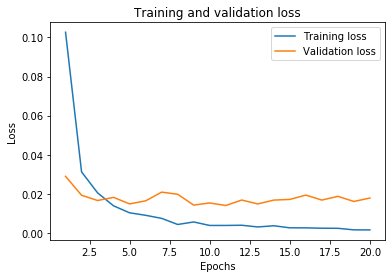

In [51]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

In [127]:
def predict(model,i):
    clean_text =[]
    i = basic_text_cleaning(i)
    clean_text.append(i)
    sequences = tokenizer.texts_to_sequences(clean_text)
    data = pad_sequences(sequences, padding = 'post', maxlen = MAX_SEQUENCE_LENGTH)
    pred = model.predict(data)
    return pred

In [128]:
test = "Facebook Inc will allow employees participating in the protest to take the time off without drawing down their vacation days, spokesman Andy Stone said. Separately, online therapy company Talkspace said it ended partnership discussions with Facebook. Talkspace CEO Oren Frank tweeted he would “not support a platform that incites violence, racism, and lies.”"

In [132]:
predict(model=model_new,i=test)[0][0]

0.60484546

In [94]:
model.predict(x_test)

array([[4.3928901e-09, 1.0000000e+00],
       [3.9913253e-14, 1.0000000e+00],
       [1.0000000e+00, 6.2545832e-12],
       ...,
       [5.1183279e-15, 1.0000000e+00],
       [9.8688555e-01, 1.6947305e-02],
       [2.2732119e-07, 9.9999976e-01]], dtype=float32)

In [97]:
x_test[2]

array([ 1765,    17,  2389,  1765,    47,  1120,  2869,    29,    45,
           8,  2317,   386,     9,   490,  8097,   125,   519,  1955,
         935,   115,   129,  8173,  3830,     1,   127,     8,    19,
         734,  1120,   618,   737,    29,    45,   619,     9,  3830,
           1,     8,    57,    29,    45,  3558,  2317,   490,   635,
           5,    81,   500,   179,   737,   471,     9,     8,  5469,
         517, 43082,     5,    81,  2969,  8368,  6292,  5802,   215,
           9,  3830,   316,  1765,  1868,  2176,   877,    30,  7832,
         392,  6292,  5802,  8566,   273,   646,    28,   896,  1002,
        3578,   392,     7,    10,    20,     2,  1066,  3181,   619,
         104,   215,   311,   127,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [108]:
y_classes = predict(model=model,i=test).argmax(axis=-1)

In [115]:
y_classes[0]

0

In [117]:
from tensorflow.keras.models import load_model
model_new = load_model("LSTM_model.h5")